Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

pd.options.display.max_columns=100

Загрузка обучающего и тестового датасетов

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
purpose = [
    'purpose_credit_card',
    'purpose_debt_consolidation',
    'purpose_home_improvement',
    'purpose_house',
    'purpose_major_purchase',
    'purpose_medical',
    'purpose_moving',
    'purpose_other',
    'purpose_renewable_energy',
    'purpose_small_business',
    'purpose_vacation',
    'purpose_wedding',
]

train['purpose'] = train[purpose].idxmax(axis=1)
train.drop(columns=purpose, axis=1, inplace=True)

test['purpose'] = test[purpose].idxmax(axis=1)
test.drop(columns=purpose, axis=1, inplace=True)


subgrade = [
    'sub_grade_A1',
    'sub_grade_A2',
    'sub_grade_A3',
    'sub_grade_A4',
    'sub_grade_A5',
    'sub_grade_B1',
    'sub_grade_B2',
    'sub_grade_B3',
    'sub_grade_B4',
    'sub_grade_B5',
    'sub_grade_C1',
    'sub_grade_C2',
    'sub_grade_C3',
    'sub_grade_C4',
    'sub_grade_C5',
    'sub_grade_D1',
    'sub_grade_D2',
    'sub_grade_D3',
    'sub_grade_D4',
    'sub_grade_D5',
    'sub_grade_E1',
    'sub_grade_E2',
    'sub_grade_E3',
    'sub_grade_E4',
    'sub_grade_E5',
    'sub_grade_F1',
    'sub_grade_F2',
    'sub_grade_F3',
    'sub_grade_F4',
    'sub_grade_F5',
    'sub_grade_G1',
    'sub_grade_G2',
    'sub_grade_G3',
    'sub_grade_G4',
    'sub_grade_G5',
]

train['subgrade'] = train[subgrade].idxmax(axis=1)
train.drop(columns=subgrade, axis=1, inplace=True)

test['subgrade'] = test[subgrade].idxmax(axis=1)
test.drop(columns=subgrade, axis=1, inplace=True)

home_ownership = [
    'home_ownership_MORTGAGE',
    'home_ownership_NONE',
    'home_ownership_OTHER',
    'home_ownership_OWN',
    'home_ownership_RENT'
]

train['home_ownership'] = train[home_ownership].idxmax(axis=1)
train.drop(columns=home_ownership, axis=1, inplace=True)

test['home_ownership'] = test[home_ownership].idxmax(axis=1)
test.drop(columns=home_ownership, axis=1, inplace=True)

In [4]:
train.columns

Index(['installment', 'dti', 'funded_amnt', 'annual_inc', 'emp_length', 'term',
       'inq_last_6mths', 'mths_since_recent_inq', 'delinq_2yrs',
       'chargeoff_within_12_mths', 'num_accts_ever_120_pd',
       'num_tl_90g_dpd_24m', 'acc_open_past_24mths', 'avg_cur_bal',
       'tot_hi_cred_lim', 'delinq_amnt', 'def', 'purpose_car', 'id', 'purpose',
       'subgrade', 'home_ownership'],
      dtype='object')

In [5]:
train.head()

,installment,dti,funded_amnt,annual_inc,emp_length,term,inq_last_6mths,mths_since_recent_inq,delinq_2yrs,chargeoff_within_12_mths,num_accts_ever_120_pd,num_tl_90g_dpd_24m,acc_open_past_24mths,avg_cur_bal,tot_hi_cred_lim,delinq_amnt,def,purpose_car,id,purpose,subgrade,home_ownership
0,365.59,12.92,10500,66400.0,6.0,36,0,7.0,0,0,0.0,0.0,4.0,2879.0,35225.0,0,0,0.0,0,purpose_debt_consolidation,sub_grade_C2,home_ownership_RENT
1,535.54,19.11,15000,80000.0,10.0,36,1,2.0,1,0,3.0,0.0,4.0,13266.0,164512.0,0,0,0.0,1,purpose_credit_card,sub_grade_C5,home_ownership_MORTGAGE
2,517.16,26.55,22400,50000.0,10.0,60,4,2.0,0,0,0.0,0.0,3.0,12445.0,163277.0,0,0,0.0,2,purpose_credit_card,sub_grade_C1,home_ownership_MORTGAGE
3,342.66,5.74,9800,41000.0,0.0,36,1,4.0,1,0,0.0,0.0,5.0,1936.0,37600.0,0,0,0.0,3,purpose_debt_consolidation,sub_grade_C5,home_ownership_RENT
4,381.46,4.88,17325,74000.0,10.0,60,1,6.0,0,0,0.0,0.0,3.0,35056.0,190262.0,0,0,0.0,4,purpose_home_improvement,sub_grade_B3,home_ownership_MORTGAGE


In [6]:
test.head()

,Unnamed: 0,installment,dti,funded_amnt,annual_inc,emp_length,term,inq_last_6mths,mths_since_recent_inq,delinq_2yrs,chargeoff_within_12_mths,num_accts_ever_120_pd,num_tl_90g_dpd_24m,acc_open_past_24mths,avg_cur_bal,tot_hi_cred_lim,delinq_amnt,purpose_car,id,purpose,subgrade,home_ownership
0,0,468.29,23.42,14000,57640.0,10.0,36,0,10.0,0,0,1.0,0.0,2.0,6660.0,72729.0,0,0.0,0,purpose_debt_consolidation,sub_grade_B4,home_ownership_RENT
1,1,303.73,3.29,9000,54000.0,2.0,36,1,3.0,0,0,0.0,0.0,8.0,530.0,35900.0,0,0.0,1,purpose_credit_card,sub_grade_B4,home_ownership_RENT
2,2,931.19,20.80,35000,100000.0,2.0,60,0,13.0,0,0,0.0,0.0,1.0,21135.0,187270.0,0,0.0,2,purpose_debt_consolidation,sub_grade_D5,home_ownership_MORTGAGE
3,3,632.88,16.62,27000,98528.0,10.0,60,1,3.0,0,0,0.0,0.0,5.0,35819.0,383955.0,0,0.0,3,purpose_debt_consolidation,sub_grade_C1,home_ownership_MORTGAGE
4,4,144.13,7.81,4000,45000.0,10.0,36,1,1.0,2,0,0.0,2.0,3.0,9966.0,113298.0,0,0.0,4,purpose_debt_consolidation,sub_grade_D1,home_ownership_RENT


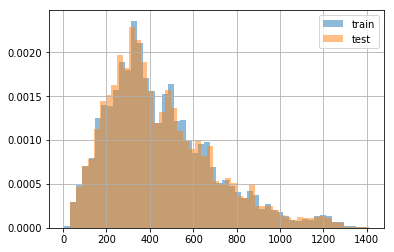

In [7]:
train['installment'].hist(bins=50, density='uniform', label='train', alpha=0.5)
test['installment'].hist(bins=50, density='uniform', label='test', alpha=0.5)
plt.legend()
plt.show()

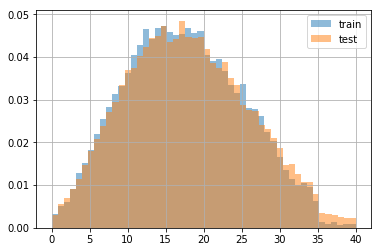

In [8]:
train['dti'].hist(bins=50, density='uniform', label='train', alpha=0.5)
test['dti'].hist(bins=50, density='uniform', label='test', alpha=0.5)
plt.legend()
plt.show()

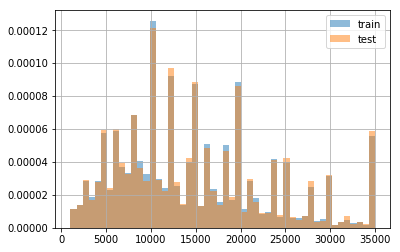

In [9]:
feature = 'funded_amnt'
train[feature].hist(bins=50, density='uniform', label='train', alpha=0.5)
test[feature].hist(bins=50, density='uniform', label='test', alpha=0.5)
plt.legend()
plt.show()

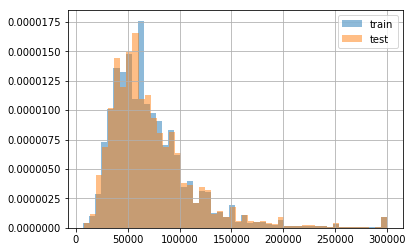

In [10]:
feature = 'annual_inc'
train[feature].clip(0, 300000).hist(bins=50, density='uniform', label='train', alpha=0.5)
test[feature].clip(0, 300000).hist(bins=50, density='uniform', label='test', alpha=0.5)
plt.legend()
plt.show()

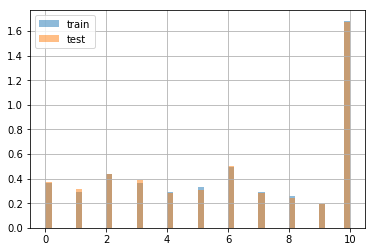

In [11]:
feature = 'emp_length'
train[feature].clip(0, 300000).hist(bins=50, density='uniform', label='train', alpha=0.5)
test[feature].clip(0, 300000).hist(bins=50, density='uniform', label='test', alpha=0.5)
plt.legend()
plt.show()

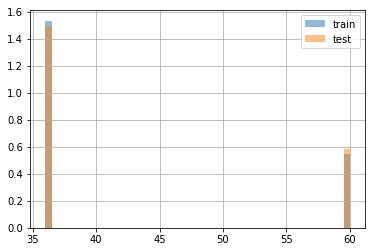

In [12]:
feature = 'term'
train[feature].clip(0, 300000).hist(bins=50, density='uniform', label='train', alpha=0.5)
test[feature].clip(0, 300000).hist(bins=50, density='uniform', label='test', alpha=0.5)
plt.legend()
plt.show()

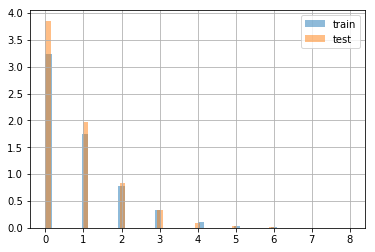

In [13]:
feature = 'inq_last_6mths'
train[feature].clip(0, 300000).hist(bins=50, density='uniform', label='train', alpha=0.5)
test[feature].clip(0, 300000).hist(bins=50, density='uniform', label='test', alpha=0.5)
plt.legend()
plt.show()

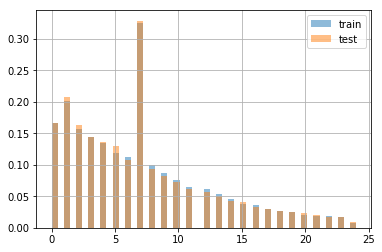

In [14]:
feature = 'mths_since_recent_inq'
train[feature].clip(0, 300000).hist(bins=50, density='uniform', label='train', alpha=0.5)
test[feature].clip(0, 300000).hist(bins=50, density='uniform', label='test', alpha=0.5)
plt.legend()
plt.show()

In [34]:
# первый займ, заполнили пропуски чем-то
train['is_first_loan'] = train['mths_since_recent_inq'].between(6.01, 6.99)

In [37]:
train[train['is_first_loan'] == False]['mths_since_recent_inq'].median()

6.0

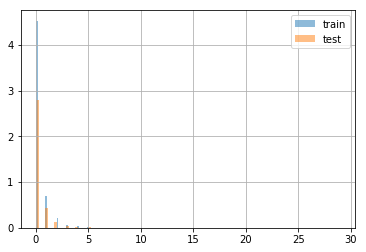

In [15]:
feature = 'delinq_2yrs'
train[feature].clip(0, 300000).hist(bins=100, density='uniform', label='train', alpha=0.5)
test[feature].clip(0, 300000).hist(bins=100, density='uniform', label='test', alpha=0.5)
plt.legend()
plt.show()

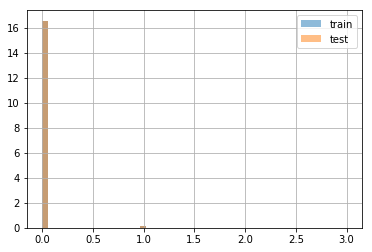

In [16]:
feature = 'chargeoff_within_12_mths'
train[feature].clip(0, 300000).hist(bins=50, density='uniform', label='train', alpha=0.5)
test[feature].clip(0, 300000).hist(bins=50, density='uniform', label='test', alpha=0.5)
plt.legend()
plt.show()

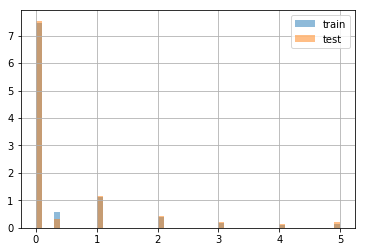

In [17]:
feature = 'num_accts_ever_120_pd'
train[feature].clip(0, 5).hist(bins=50, density='uniform', label='train', alpha=0.5)
test[feature].clip(0, 5).hist(bins=50, density='uniform', label='test', alpha=0.5)
plt.legend()
plt.show()

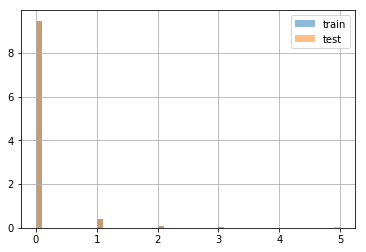

In [18]:
feature = 'num_tl_90g_dpd_24m'
train[feature].clip(0, 5).hist(bins=50, density='uniform', label='train', alpha=0.5)
test[feature].clip(0, 5).hist(bins=50, density='uniform', label='test', alpha=0.5)
plt.legend()
plt.show()

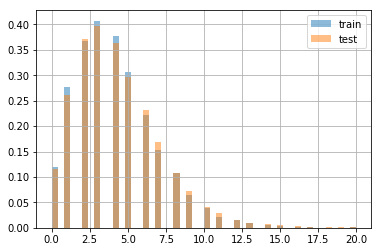

In [19]:
feature = 'acc_open_past_24mths'
train[feature].clip(0, 20).hist(bins=50, density='uniform', label='train', alpha=0.5)
test[feature].clip(0, 20).hist(bins=50, density='uniform', label='test', alpha=0.5)
plt.legend()
plt.show()

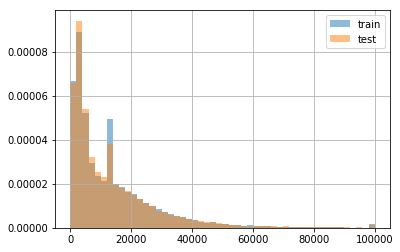

In [20]:
feature = 'avg_cur_bal'
train[feature].clip(0, 100000).hist(bins=50, density='uniform', label='train', alpha=0.5)
test[feature].clip(0, 100000).hist(bins=50, density='uniform', label='test', alpha=0.5)
plt.legend()
plt.show()

In [52]:
train['num_tl_90g_dpd_24m'].value_counts()

0.000000     26692
0.075064      1730
1.000000      1214
2.000000       248
3.000000        50
4.000000        37
6.000000         8
5.000000         7
8.000000         5
7.000000         3
10.000000        3
11.000000        1
9.000000         1
18.000000        1
Name: num_tl_90g_dpd_24m, dtype: int64

In [40]:
train['is_not_sber_client'] = train['avg_cur_bal'].between(13841.01, 13841.02)

In [49]:
train[train['is_not_sber_client']]

,installment,dti,funded_amnt,annual_inc,emp_length,term,inq_last_6mths,mths_since_recent_inq,delinq_2yrs,chargeoff_within_12_mths,num_accts_ever_120_pd,num_tl_90g_dpd_24m,acc_open_past_24mths,avg_cur_bal,tot_hi_cred_lim,delinq_amnt,def,purpose_car,id,purpose,subgrade,home_ownership,is_first_loan,is_sber_client,is_not_sber_client
38,170.09,18.07,5000,59500.0,9.0,36,2,0.0,0,0,0.377846,0.075064,3.0,13841.018793,167286.164948,0,0,0.0,38,purpose_debt_consolidation,sub_grade_B5,home_ownership_RENT,False,True,True
63,441.46,9.77,17000,106000.0,10.0,60,3,0.0,0,0,0.377846,0.075064,2.0,13841.018793,167286.164948,0,1,0.0,63,purpose_debt_consolidation,sub_grade_D4,home_ownership_MORTGAGE,False,True,True
66,222.28,12.25,7000,280000.0,10.0,36,0,8.0,0,0,0.377846,0.075064,4.0,13841.018793,167286.164948,0,0,1.0,66,purpose_credit_card,sub_grade_A5,home_ownership_MORTGAGE,False,True,True
81,485.14,10.60,15000,60000.0,10.0,36,1,6.0,0,0,0.377846,0.075064,1.0,13841.018793,167286.164948,0,0,0.0,81,purpose_debt_consolidation,sub_grade_B1,home_ownership_MORTGAGE,False,True,True
85,350.64,9.71,10000,32000.0,3.0,36,1,6.0,0,0,0.377846,0.075064,5.0,13841.018793,167286.164948,0,1,0.0,85,purpose_debt_consolidation,sub_grade_C4,home_ownership_MORTGAGE,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24952,319.14,4.77,9925,46000.0,4.0,36,0,10.0,0,0,0.377846,0.075064,8.0,13841.018793,167286.164948,0,0,0.0,24952,purpose_home_improvement,sub_grade_B1,home_ownership_RENT,False,True,True
24960,488.18,22.16,19000,58000.0,1.0,60,2,0.0,1,0,0.377846,0.075064,5.0,13841.018793,167286.164948,0,0,0.0,24960,purpose_debt_consolidation,sub_grade_D4,home_ownership_MORTGAGE,False,True,True
24962,203.23,24.48,6400,80000.0,10.0,36,1,0.0,0,0,0.377846,0.075064,3.0,13841.018793,167286.164948,0,0,0.0,24962,purpose_credit_card,sub_grade_A5,home_ownership_MORTGAGE,False,True,True
24978,482.44,22.79,14500,60400.0,9.0,36,0,11.0,0,0,0.377846,0.075064,7.0,13841.018793,167286.164948,0,0,0.0,24978,purpose_debt_consolidation,sub_grade_B3,home_ownership_MORTGAGE,False,True,True


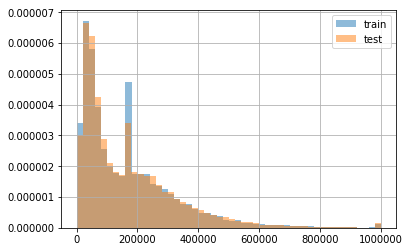

In [21]:
feature = 'tot_hi_cred_lim'
train[feature].clip(0, 1000000).hist(bins=50, density='uniform', label='train', alpha=0.5)
test[feature].clip(0, 1000000).hist(bins=50, density='uniform', label='test', alpha=0.5)
plt.legend()
plt.show()

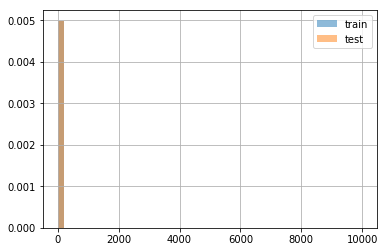

In [22]:
feature = 'delinq_amnt'
train[feature].clip(0, 10000).hist(bins=50, density='uniform', label='train', alpha=0.5)
test[feature].clip(0, 10000).hist(bins=50, density='uniform', label='test', alpha=0.5)
plt.legend()
plt.show()

In [23]:
train.groupby('purpose')['def'].agg(['mean', 'count'])

,mean,count
purpose,,
purpose_credit_card,0.136420,7279
purpose_debt_consolidation,0.168318,18067
purpose_home_improvement,0.146619,1671
purpose_house,0.157143,140
purpose_major_purchase,0.158537,492
purpose_medical,0.189655,232
purpose_moving,0.204819,166
purpose_other,0.180952,1365
purpose_renewable_energy,0.153846,13


In [33]:
train.groupby('is_first_loan')['def'].agg(['mean', 'count'])

,mean,count
is_first_loan,,
False,0.165421,26901
True,0.120039,3099


In [53]:
train.groupby('is_not_sber_client')['def'].agg(['mean', 'count'])

,mean,count
is_not_sber_client,,
False,0.159427,28270
True,0.182081,1730


In [24]:
targ_cols = [i for i in train.columns if i not in ['def', 'id'] ]

X_train = train[targ_cols]
X_test = test[targ_cols]

y_train = train["def"]

Обучение модели

In [25]:
model = LogisticRegression(C=10, fit_intercept=True, max_iter=100,
          penalty='l1', random_state=123, solver = 'liblinear',
          tol=0.01).fit(X_train, y_train)


model.fit(X_train, y_train)

ValueError: could not convert string to float: 'purpose_debt_consolidation'

Рассчет метрики на обучающей модели

In [ ]:
roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

Применение модели к тестовой выборке

In [ ]:
test['prob'] = model.predict_proba(X_test)[:, 1]

Выгрузка решения для коммита в соревновании

In [ ]:
test[['id', 'prob']].to_csv('sample_submission.csv', index=False)